In [2]:
#Import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import display
from sklearn.preprocessing import StandardScaler




import warnings
warnings.filterwarnings("ignore")

In [3]:
#Import the datasets
df = pd.read_csv('data/clean_train.csv')

In [4]:
df.head()

,Unnamed: 0,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,basin,subvillage,...,construction_year,extraction_type,management,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,status_group
0,0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,1999,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional
1,1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,2010,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,2009,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional
3,3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,1986,submersible,vwc,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional
4,4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,0,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55973 entries, 0 to 55972
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         55973 non-null  int64  
 1   id                 55973 non-null  int64  
 2   amount_tsh         55973 non-null  float64
 3   date_recorded      55973 non-null  object 
 4   gps_height         55973 non-null  int64  
 5   longitude          55973 non-null  float64
 6   latitude           55973 non-null  float64
 7   wpt_name           55973 non-null  object 
 8   basin              55973 non-null  object 
 9   subvillage         55973 non-null  object 
 10  region             55973 non-null  object 
 11  region_code        55973 non-null  int64  
 12  district_code      55973 non-null  int64  
 13  lga                55973 non-null  object 
 14  ward               55973 non-null  object 
 15  population         55973 non-null  int64  
 16  permit             559

# Visuals

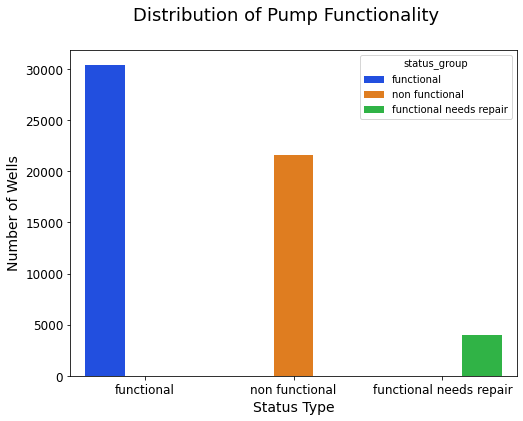

In [6]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.countplot(x='status_group', hue="status_group", palette='bright', data=df)

fig.suptitle('Distribution of Pump Functionality', fontsize=18)
plt.xlabel("Status Type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.tick_params(labelsize='large')
plt.show()


## Construction Year

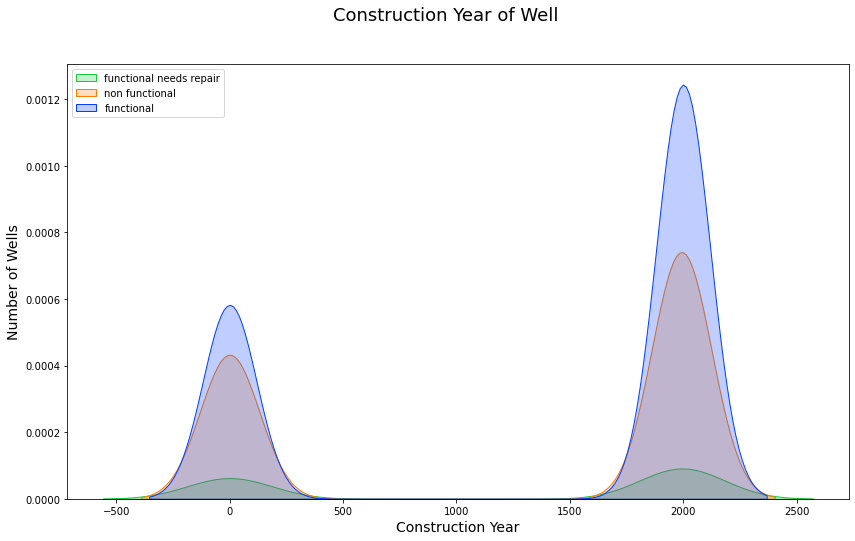

In [7]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.kdeplot(data=df, x='construction_year', hue='status_group', palette='bright', fill=True)
fig.suptitle('Construction Year of Well', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();

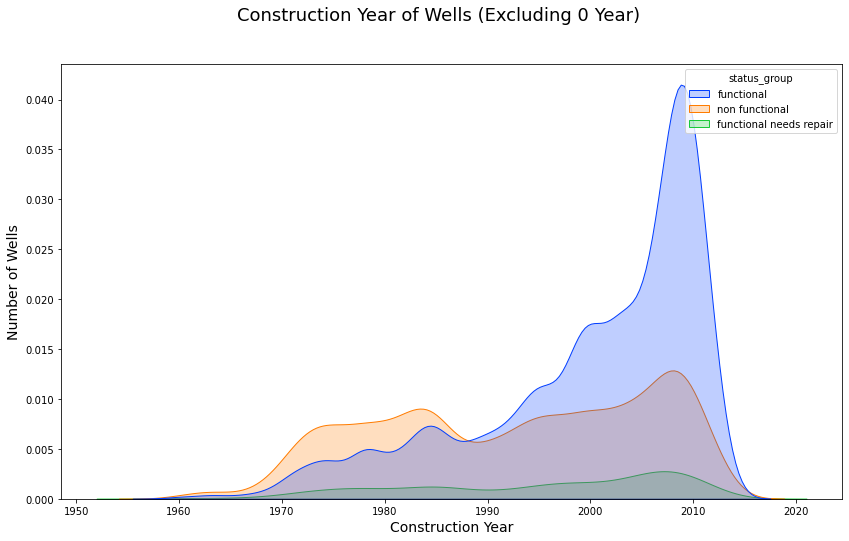

In [8]:
#Select wells without 'construction_year' = 0
df_actual_construction_years = df.loc[df['construction_year'] != 0]

fig, ax = plt.subplots(figsize=(14,8))
ax = sns.kdeplot(data=df_actual_construction_years, x='construction_year', hue='status_group', palette='bright', fill=True)
fig.suptitle('Construction Year of Wells (Excluding 0 Year)', fontsize=18)
plt.xlabel("Construction Year", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
#plt.legend(loc='upper left', labels=['functional needs repair', 'non functional', 'functional'])
plt.show();

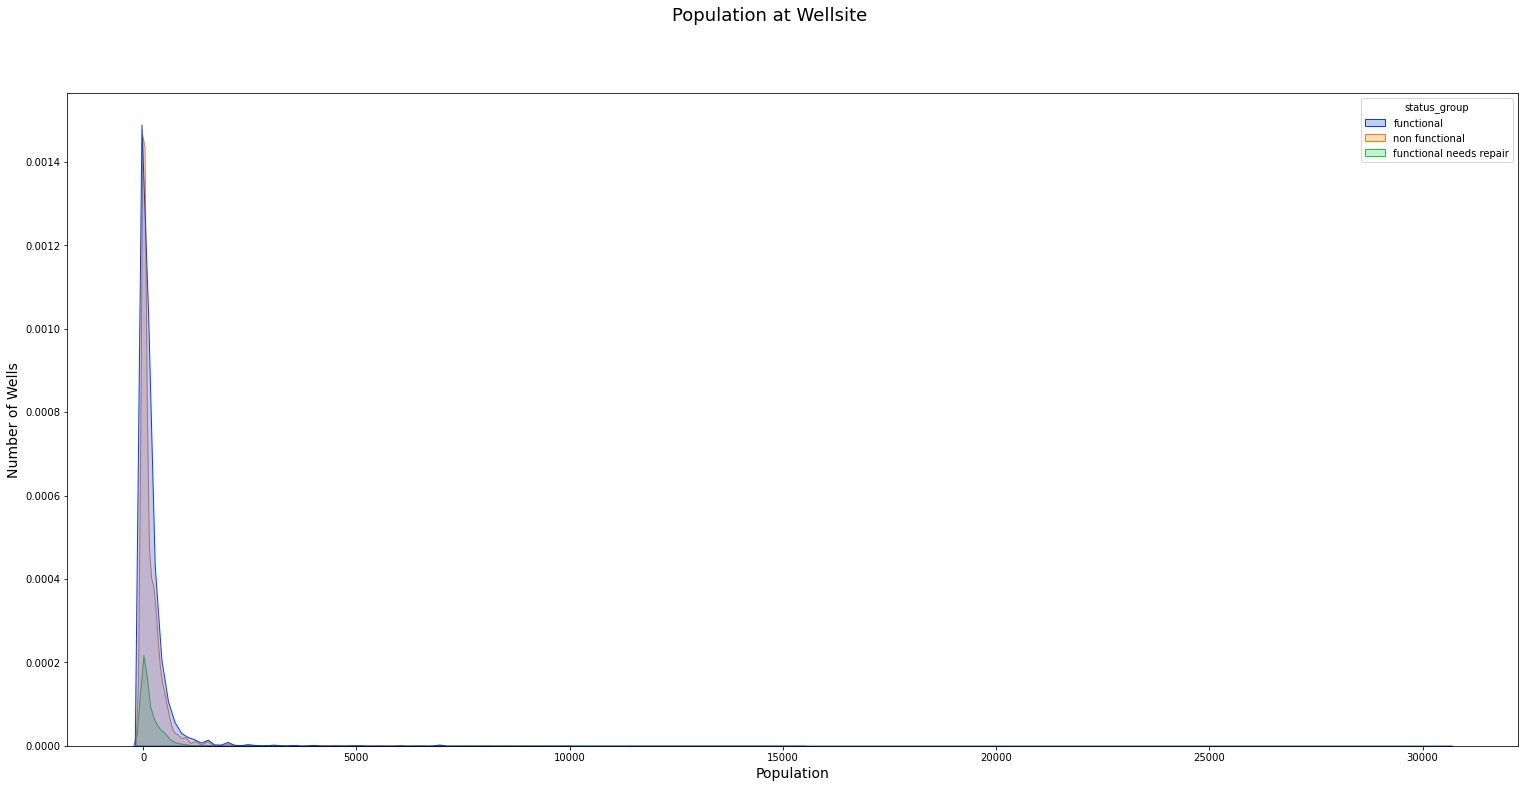

In [9]:
fig, ax = plt.subplots(figsize=(26,12))
ax = sns.kdeplot(data=df, x='population', hue='status_group', palette='bright', fill=True)
fig.suptitle('Population at Wellsite', fontsize=18)
plt.xlabel("Population", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

In [10]:
df.describe()

,Unnamed: 0,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,55973.000000,55973.000000,55973.000000,55973.000000,55973.000000,5.597300e+04,55973.000000,55973.000000,55973.000000,55973.000000
mean,29689.737677,37121.659568,324.261123,660.882032,34.022282,-5.697227e+00,15.602362,5.794222,180.953710,1311.230736
std,17143.177953,21451.801055,2658.326431,690.599893,6.754396,2.963941e+00,18.016078,9.895195,466.045819,948.245262
min,0.000000,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,1.000000,0.000000,0.000000,0.000000
25%,14858.000000,18523.000000,0.000000,0.000000,33.000334,-8.479731e+00,5.000000,2.000000,0.000000,0.000000
50%,29686.000000,37065.000000,0.000000,360.000000,34.963146,-5.012906e+00,12.000000,3.000000,30.000000,1986.000000
75%,44521.000000,55656.000000,30.000000,1303.000000,37.271827,-3.317950e+00,17.000000,5.000000,223.000000,2004.000000
max,59399.000000,74247.000000,250000.000000,2770.000000,40.345193,-2.000000e-08,99.000000,80.000000,30500.000000,2013.000000


In [11]:
#Drop the rows where population is 0
pop_none0 = df.loc[df['population'] != 0]
pop_none0.describe()

,Unnamed: 0,id,amount_tsh,gps_height,longitude,latitude,region_code,district_code,population,construction_year
count,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000,36062.000000
mean,29714.279630,37123.497255,452.162244,947.633354,36.111405,-6.262265,16.348539,6.514503,280.864123,1960.823221
std,17163.488698,21394.653114,3264.605949,617.007697,2.638423,2.741978,22.094061,11.562476,555.933857,266.364506
min,0.000000,1.000000,0.000000,-90.000000,29.607122,-11.649440,2.000000,1.000000,1.000000,0.000000
25%,14874.500000,18553.500000,0.000000,331.000000,34.718816,-8.633876,4.000000,2.000000,40.250000,1986.000000
50%,29719.500000,37134.500000,0.000000,1084.000000,36.802988,-6.176175,10.000000,3.000000,150.000000,2000.000000
75%,44570.750000,55495.500000,200.000000,1442.000000,38.069305,-3.662432,16.000000,5.000000,324.000000,2008.000000
max,59399.000000,74247.000000,250000.000000,2770.000000,40.345193,-1.042375,99.000000,67.000000,30500.000000,2013.000000


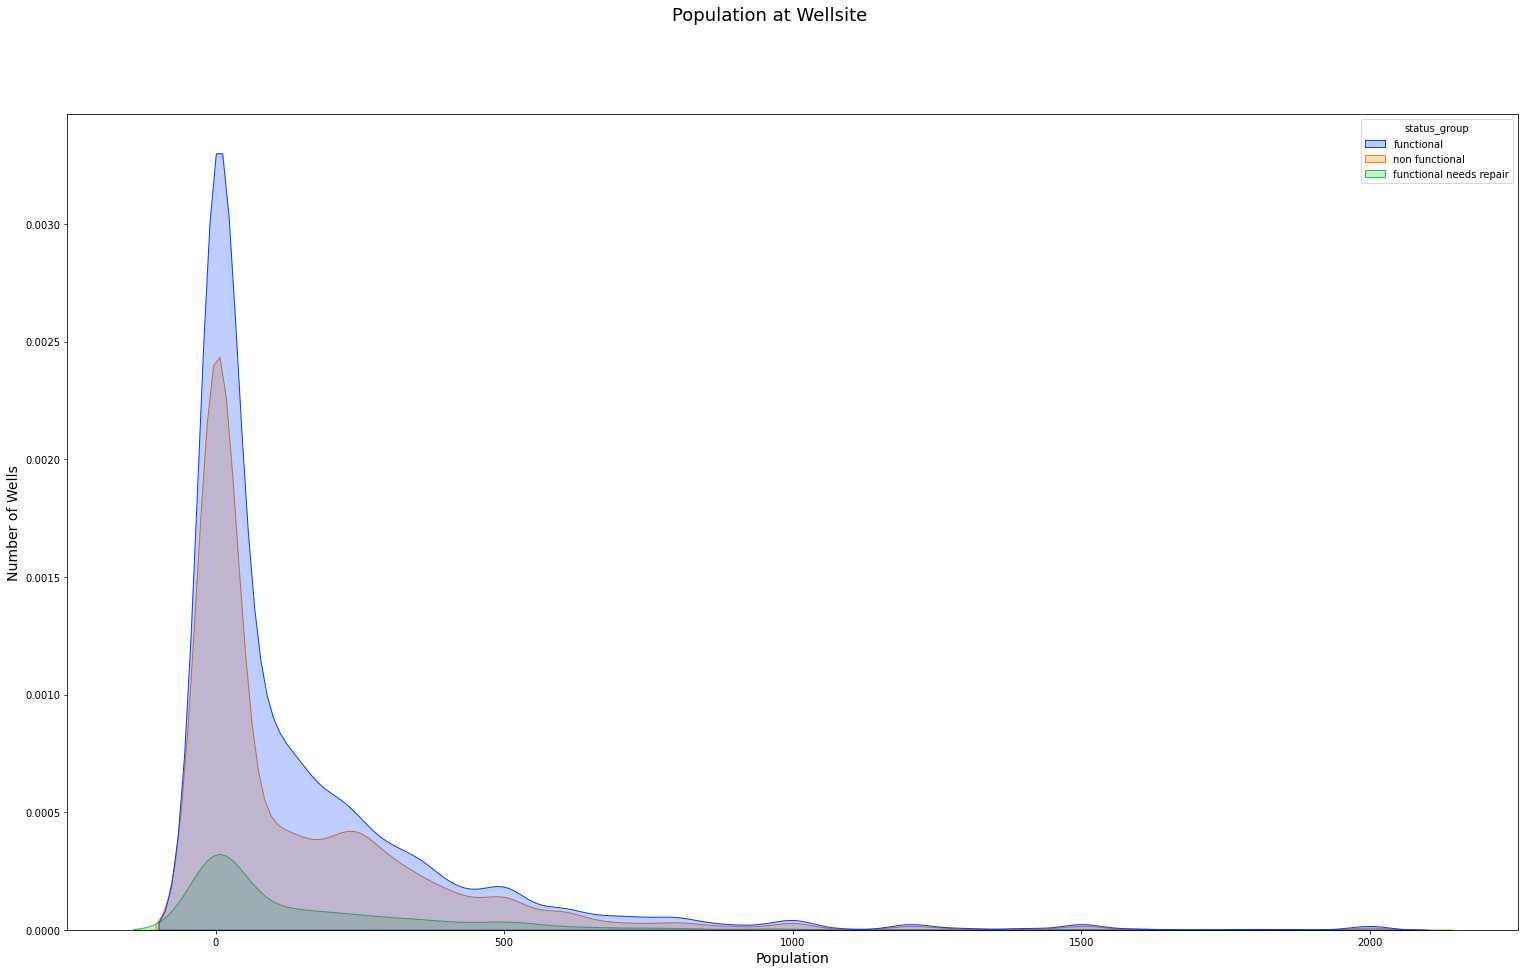

In [12]:
# Get a closer look
pop_df = df.loc[df['population'] <= 2000]

fig, ax = plt.subplots(figsize=(26,15))
ax = sns.kdeplot(data=pop_df, x='population', hue='status_group', palette='bright', fill=True)
fig.suptitle('Population at Wellsite', fontsize=18)
plt.xlabel("Population", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

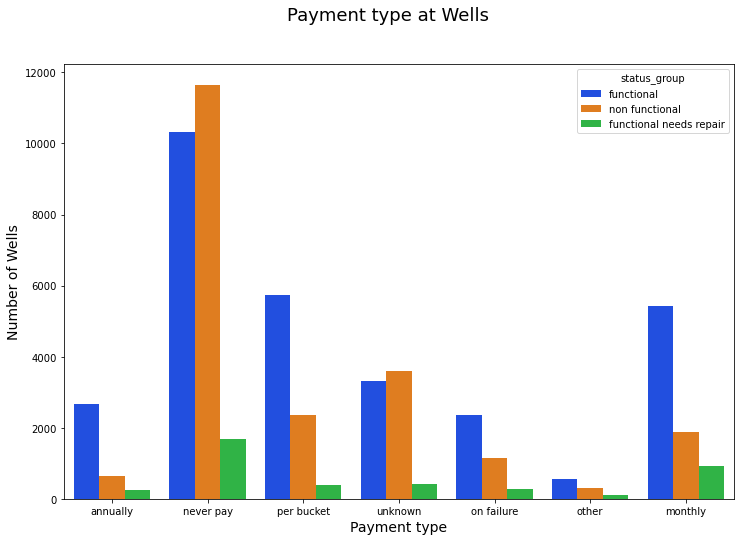

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='payment_type', hue="status_group", palette='bright', data=df)

fig.suptitle('Payment type at Wells', fontsize=18)
plt.xlabel("Payment type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

In [14]:
df['North_South'] = np.where(df['latitude'] >= -5.1, 'North', 'South')

In [15]:
df

,Unnamed: 0,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,basin,subvillage,...,extraction_type,management,payment_type,water_quality,quantity,source_type,source_class,waterpoint_type,status_group,North_South
0,0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,Lake Nyasa,Mnyusi B,...,gravity,vwc,annually,soft,enough,spring,groundwater,communal standpipe,functional,South
1,1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,Lake Victoria,Nyamara,...,gravity,wug,never pay,soft,insufficient,rainwater harvesting,surface,communal standpipe,functional,North
2,2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,Pangani,Majengo,...,gravity,vwc,per bucket,soft,enough,dam,surface,communal standpipe multiple,functional,North
3,3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mahakamani,...,submersible,vwc,never pay,soft,dry,borehole,groundwater,communal standpipe multiple,non functional,South
4,4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,Lake Victoria,Kyanyamisa,...,gravity,other,never pay,soft,seasonal,rainwater harvesting,surface,communal standpipe,functional,North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55968,59395,60739,10.0,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,Pangani,Kiduruni,...,gravity,water board,per bucket,soft,enough,spring,groundwater,communal standpipe,functional,North
55969,59396,27263,4700.0,2011-05-07,1212,35.249991,-9.070629,Kwa Yahona Kuvala,Rufiji,Igumbilo,...,gravity,vwc,annually,soft,enough,river/lake,surface,communal standpipe,functional,South
55970,59397,37057,0.0,2011-04-11,0,34.017087,-8.750434,Mashine,Rufiji,Madungulu,...,swn 80,vwc,monthly,fluoride,enough,borehole,groundwater,hand pump,functional,South
55971,59398,31282,0.0,2011-03-08,0,35.861315,-6.378573,Mshoro,Rufiji,Mwinyi,...,nira/tanira,vwc,never pay,soft,insufficient,shallow well,groundwater,hand pump,functional,South


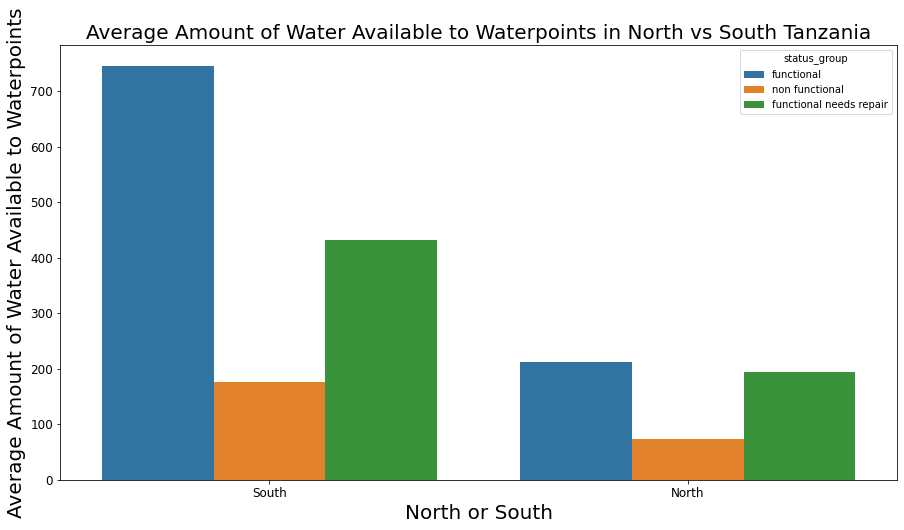

In [16]:
fig, ax = plt.subplots(figsize = (15 , 8))

import matplotlib.ticker as ticker
from matplotlib import pyplot as plt

sns.barplot(x=df["North_South"], y=df['amount_tsh'], hue=df["status_group"], ci = None)
ax.set_xlabel('North or South', fontsize = 20)
ax.set_ylabel('Average Amount of Water Available to Waterpoints', fontsize = 20)
ax.set_title('Average Amount of Water Available to Waterpoints in North vs South Tanzania', fontsize = 20)
plt.ticklabel_format(style='plain',axis='y')
ax.tick_params(axis='both', which='major', labelsize=12);

In [13]:
df.drop('Unnamed: 0', axis=1, inplace=True)

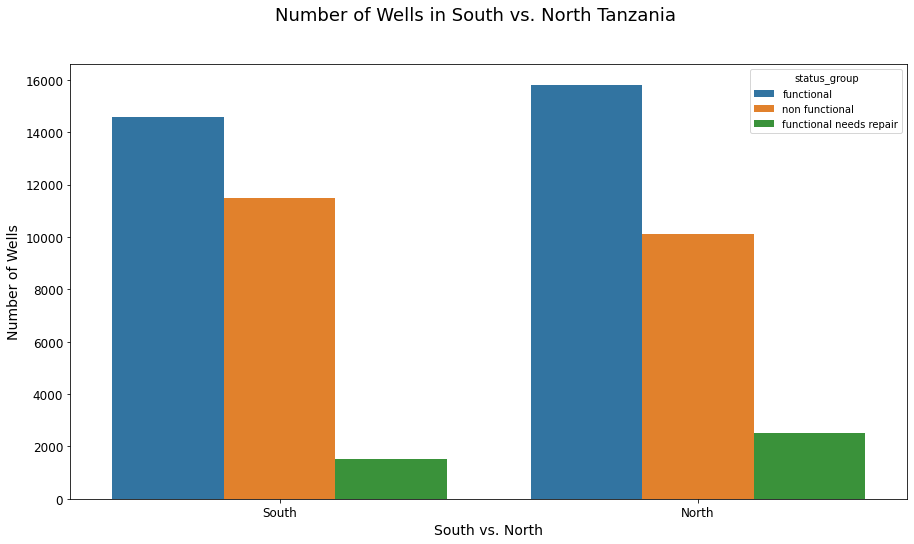

In [17]:
fig, ax = plt.subplots(figsize = (15 , 8))
ax = sns.countplot(x='North_South', hue="status_group", data=df)

fig.suptitle('Number of Wells in South vs. North Tanzania', fontsize=18)
plt.xlabel('South vs. North', fontsize=14)
plt.ylabel('Number of Wells', fontsize=14)
plt.ticklabel_format(style='plain',axis='y')
ax.tick_params(axis='both', which='major', labelsize=12);

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55973 entries, 0 to 55972
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         55973 non-null  int64  
 1   id                 55973 non-null  int64  
 2   amount_tsh         55973 non-null  float64
 3   date_recorded      55973 non-null  object 
 4   gps_height         55973 non-null  int64  
 5   longitude          55973 non-null  float64
 6   latitude           55973 non-null  float64
 7   wpt_name           55973 non-null  object 
 8   basin              55973 non-null  object 
 9   subvillage         55973 non-null  object 
 10  region             55973 non-null  object 
 11  region_code        55973 non-null  int64  
 12  district_code      55973 non-null  int64  
 13  lga                55973 non-null  object 
 14  ward               55973 non-null  object 
 15  population         55973 non-null  int64  
 16  permit             559

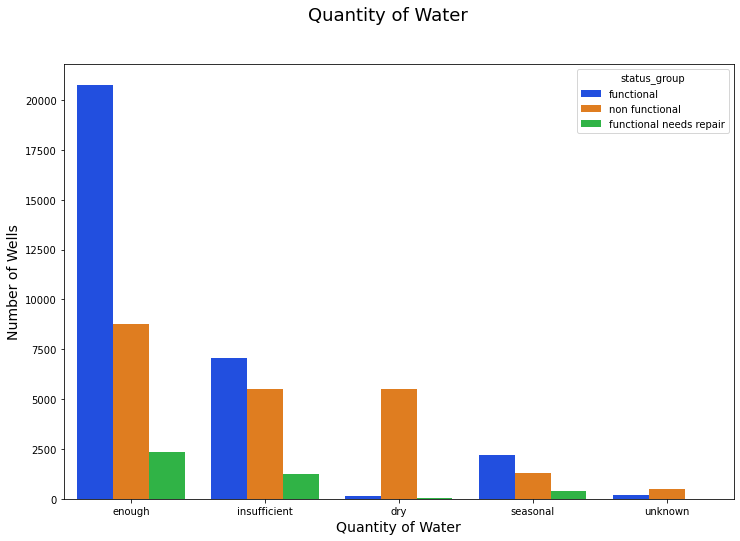

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.countplot(x='quantity', hue="status_group", palette='bright', data=df)

fig.suptitle('Quantity of Water', fontsize=18)
plt.xlabel("Quantity of Water", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

In [ ]:
df1 = tree_train(cat_col)


X = dum_df.drop('status_group', axis=1)
y = dum_df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.15)

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_train, y_train)

y_pred = tree_clf.predict(X_test)

accuracy_score(y_test, y_pred)

In [20]:
#fig, ax = plt.subplots(figsize=(12,8))
#ax = sns.countplot(x='gps_height', hue="status_group", palette='bright', data=df)
#
#fig.suptitle('gps_height of Water', fontsize=18)
#plt.xlabel("gps_height of Water", fontsize=14)
#plt.ylabel("Number of Wells", fontsize=14)
#plt.show()

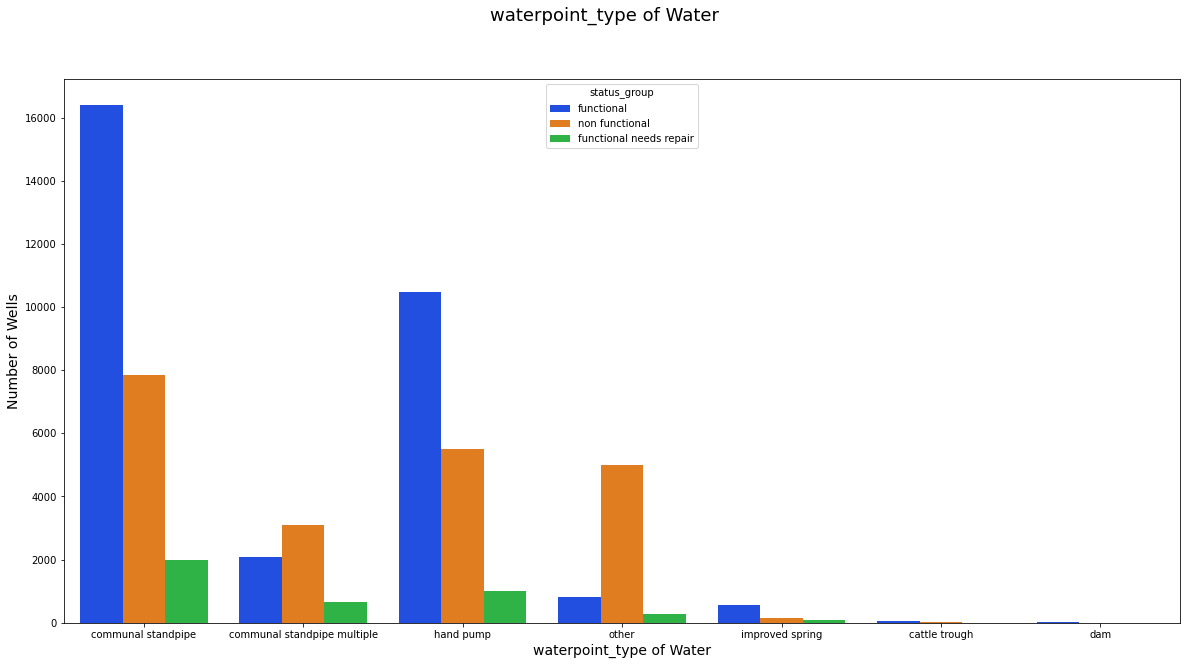

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='waterpoint_type', hue="status_group", palette='bright', data=df)

fig.suptitle('waterpoint_type of Water', fontsize=18)
plt.xlabel("waterpoint_type of Water", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

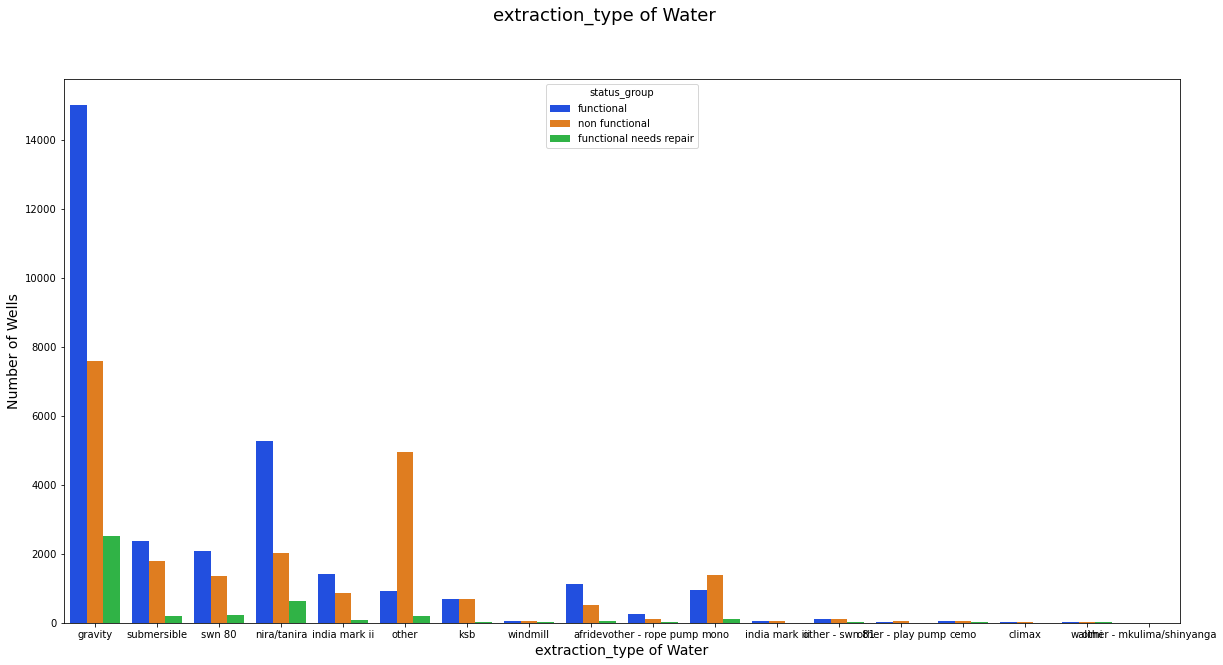

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='extraction_type', hue="status_group", palette='bright', data=df)

fig.suptitle('extraction_type of Water', fontsize=18)
plt.xlabel("extraction_type of Water", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

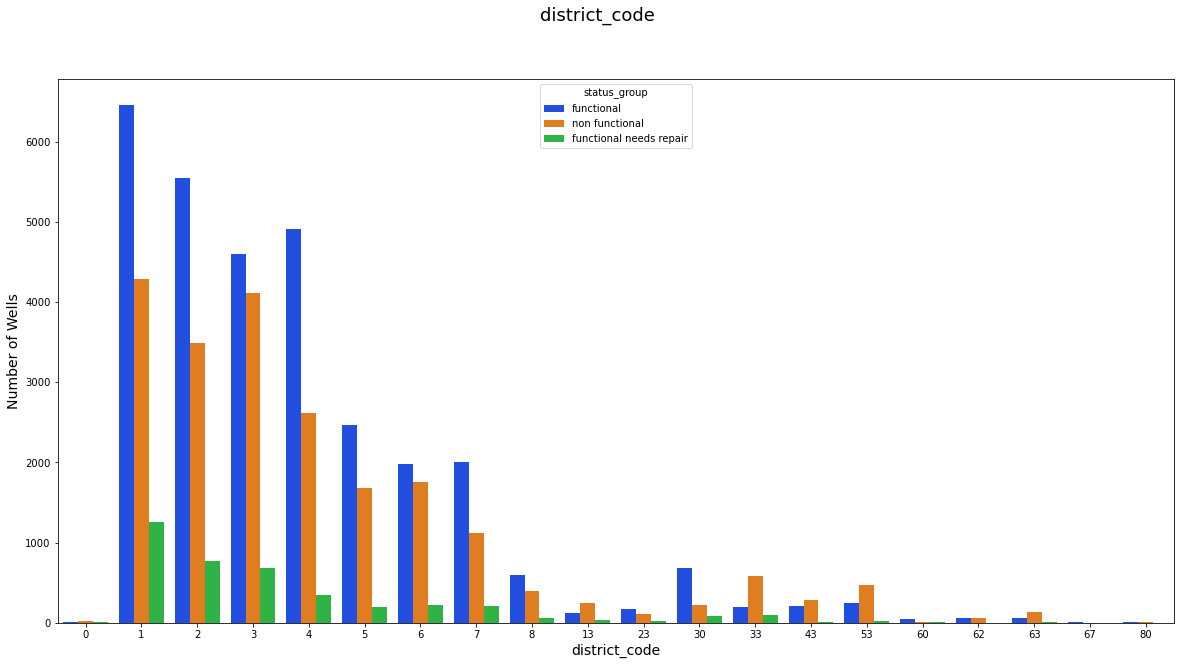

In [23]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='district_code', hue="status_group", palette='bright', data=df)

fig.suptitle('district_code', fontsize=18)
plt.xlabel("district_code", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

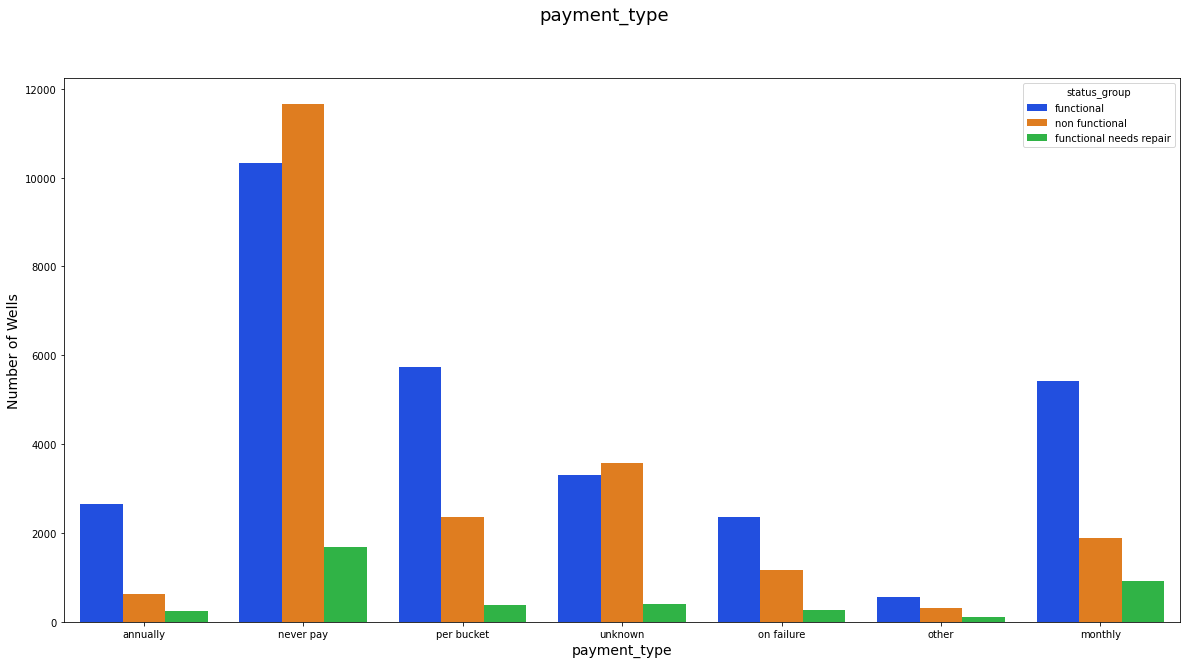

In [24]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='payment_type', hue="status_group", palette='bright', data=df)

fig.suptitle('payment_type', fontsize=18)
plt.xlabel("payment_type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

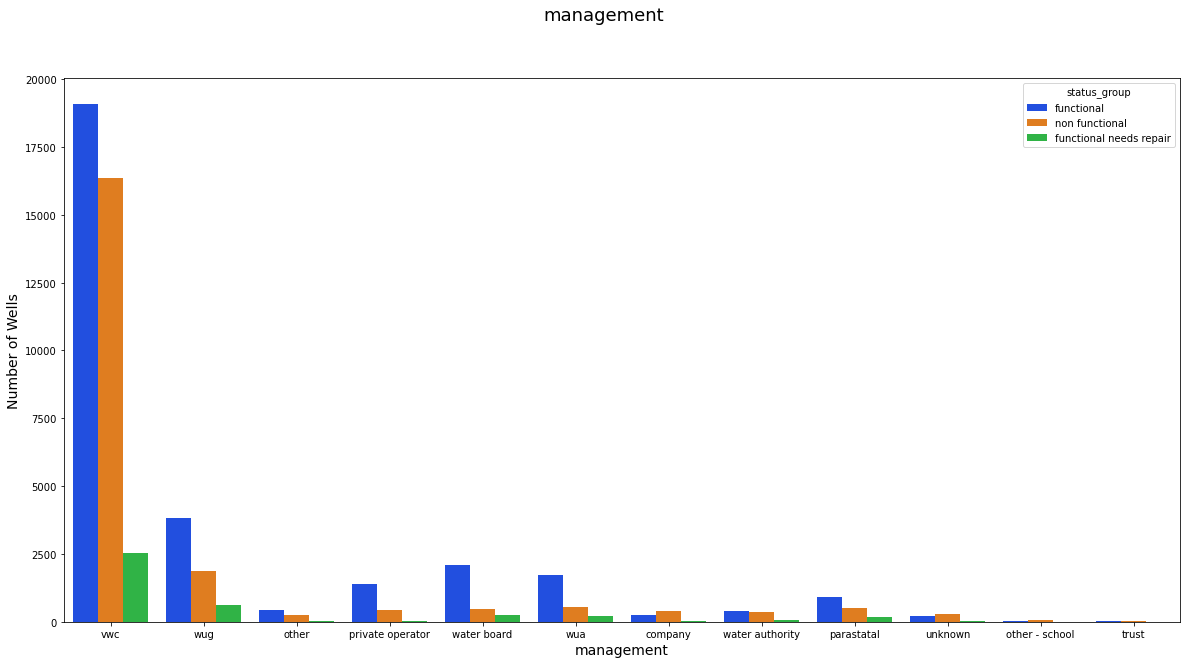

In [25]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='management', hue="status_group", palette='bright', data=df)

fig.suptitle('management', fontsize=18)
plt.xlabel("management", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

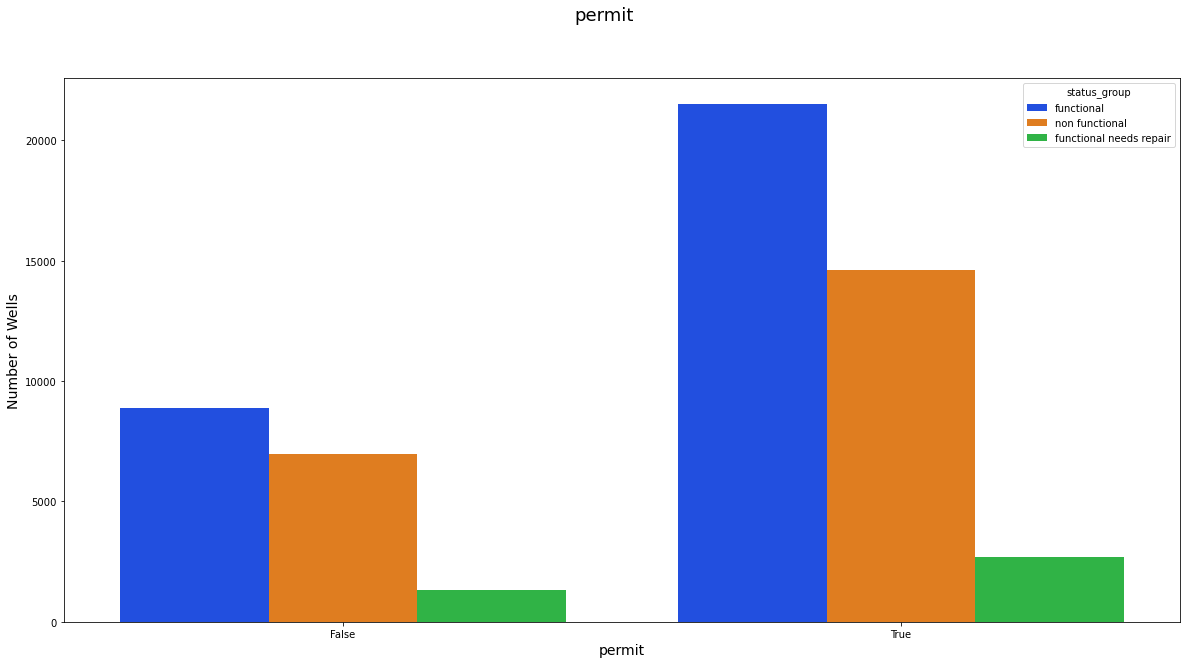

In [26]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='permit', hue="status_group", palette='bright', data=df)

fig.suptitle('permit', fontsize=18)
plt.xlabel("permit", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

In [ ]:
['quantity_dry', 'construction_year', 'gps_height',
'waterpoint_type_other', 'population', 'quantity_enough',
'extraction_type_other', 'amount_tsh', 'district_code',
'payment_type_never pay', 'region_code', 'quantity_insufficient',
'waterpoint_type_hand pump', 'waterpoint_type_communal standpipe',
'waterpoint_type_communal standpipe multiple', 'management_vwc',
'extraction_type_gravity', 'extraction_type_nira/tanira', 'permit',
'source_type_shallow well']])

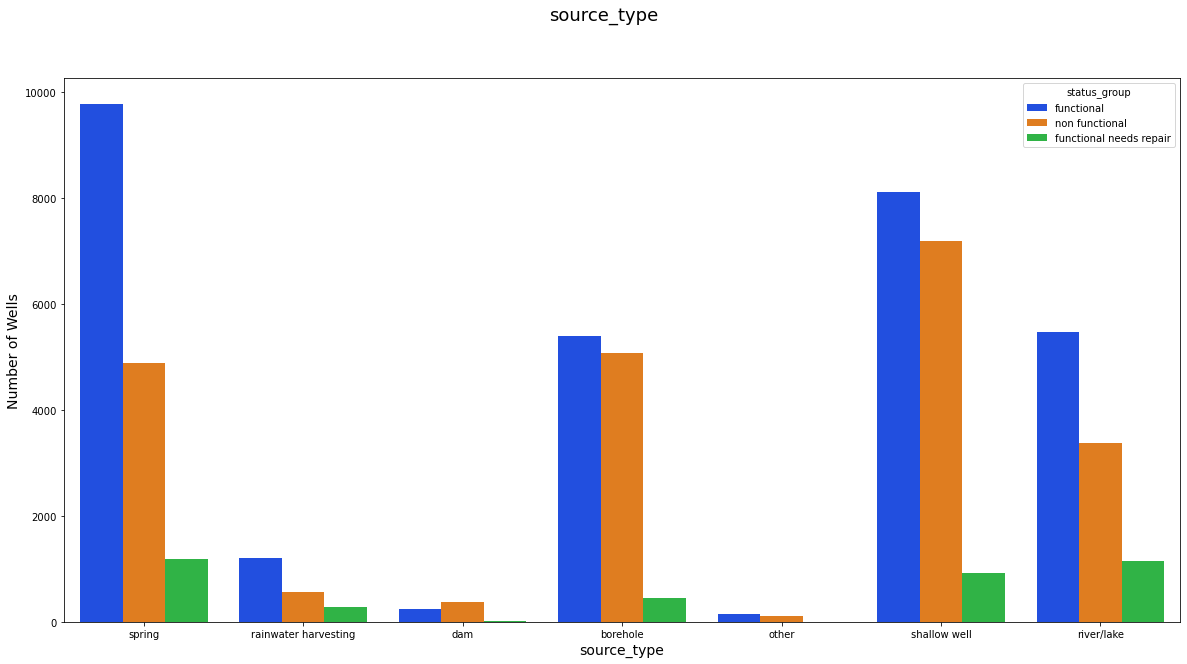

In [27]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='source_type', hue="status_group", palette='bright', data=df)

fig.suptitle('source_type', fontsize=18)
plt.xlabel("source_type", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()

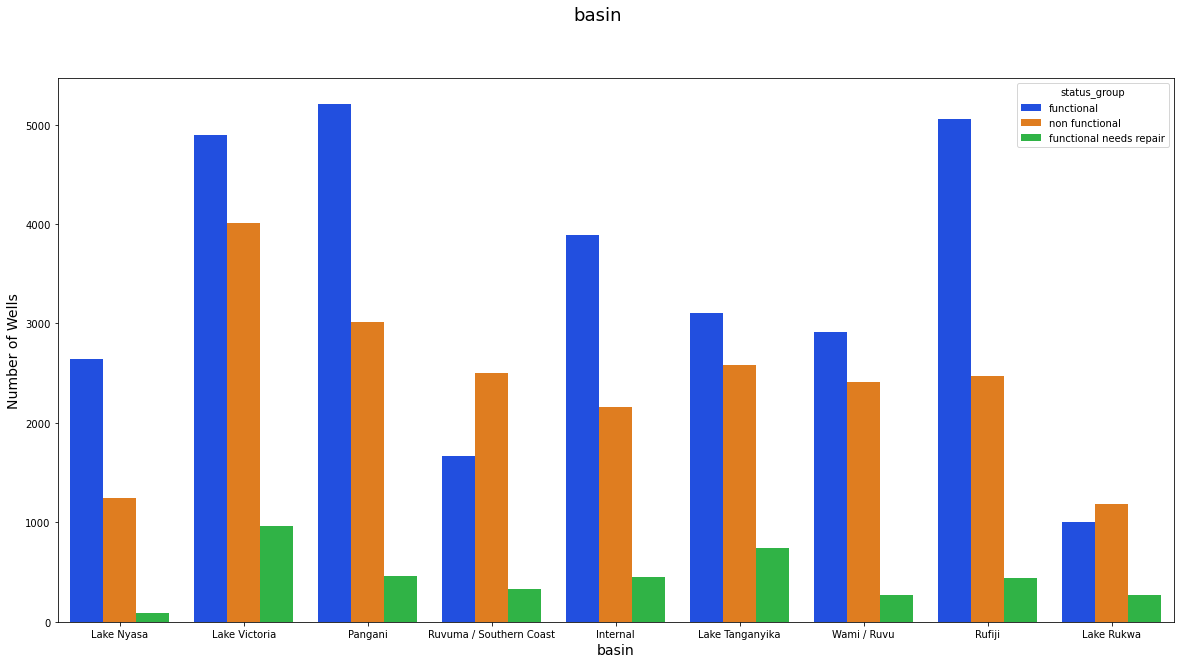

In [28]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(x='basin', hue="status_group", palette='bright', data=df)

fig.suptitle('basin', fontsize=18)
plt.xlabel("basin", fontsize=14)
plt.ylabel("Number of Wells", fontsize=14)
plt.show()